## Crop MRC files

This notebook is used to crop a raw MRC file which contains data organized in Z-dir-phase-Y-X order. 

In [2]:
import os
import mrc as Mrc
import napari
from tnia.plotting.projections import show_xyz_max

## Choose parameters

First choose input path, output path, base name, number directions and phases.

Also

```z_crop_n_start```: starting slice for optional z crop, set to zero if no z crop desired  
```z_crop_n_end```: end slice for optional z crop, set to -1 if no z crop desired   
```crop_xy_with_napari```: Set to True to choose XY crop with Napari ROI.

In [3]:
input_path = r'D:\Janelia\Data 2024-08-22\561nm cell 5 good signal_20240627_151300'
output_path = r'D:\Janelia\Data 2024-08-22\561nm cell 5 good signal_20240627_151300 cropped'
base_name = '560 nm 615 45 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1'

input_path = r'D:\Janelia\Data 2024-06-30\488cm cell 5 good signal_20240627_131236  Fail'
output_path = r'D:\Janelia\Data 2024-06-30\cell 5 Oct 1 cropped'
base_name = r'488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1'

input_path = r'D:\Janelia\Data 2024-09-03\560cm cell 4 _20240627_124604'
output_path = r'D:\Janelia\Data 2024-10-16\560cm cell 4 _20240627_124604 cropped'
base_name = '560 nm 615 45 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1'

#input_path = r'D:\Janelia\Data 2024-06-30\cell 2 Sep 23'
#output_path = r'D:\Janelia\Data 2024-06-30\cell 2 Sep 23 cropped'
#base_name = '488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1'

#input_path = r'D:\Janelia\Data 2024-06-30\cell 5 Oct 7'
#output_path = r'D:\Janelia\Data 2024-06-30\cell 5 Oct 15 crop'
#base_name = '488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1'

input_name = os.path.join(input_path, base_name+'.mrc')

if not os.path.exists(output_path):
    os.makedirs(output_path)

mrc = Mrc.Mrc(input_name)
mrc_data = mrc.data

boxes_layer = None

ndirs = 3
nphases = 5

n_slices_per_z = ndirs*nphases
z_crop_n_start = 0 
z_crop_n_end = -1
crop_xy_with_napari = True

In [4]:
import numpy as np

mrc_data.max()

temp = np.argmax(mrc_data)
temp = np.unravel_index(temp, mrc_data.shape)

print(temp)

(110, 339, 143)


## Optionally use napari to choose an XY ROI

In [5]:
if crop_xy_with_napari:
    viewer = napari.Viewer()

    viewer.add_image(mrc_data, name='mrc_data')

    boxes_layer = viewer.add_shapes(
                name="Label box",
                face_color="transparent",
                edge_color="blue",
                edge_width=7,
            )

## Perform XY Crop

1
[[213.10299589 148.38350656]
 [213.10299589 631.77518853]
 [733.14997129 631.77518853]
 [733.14997129 148.38350656]]


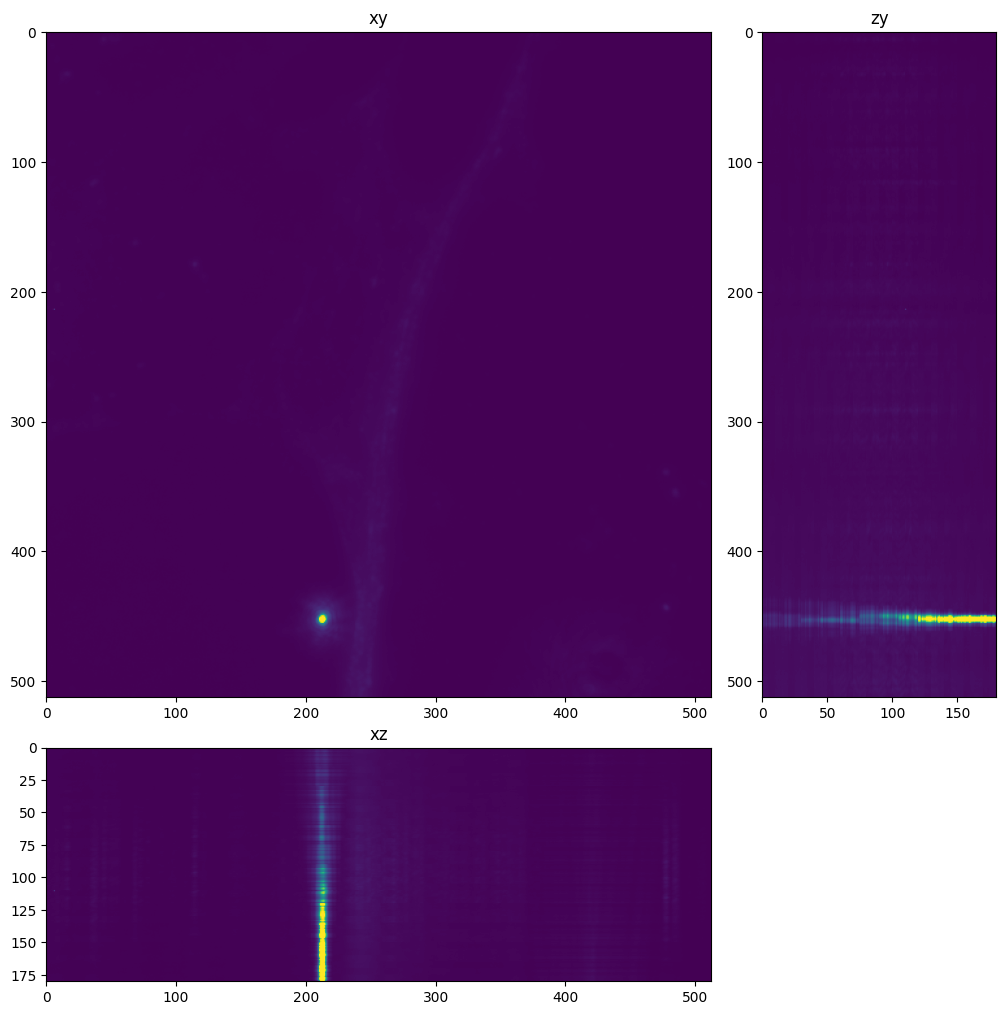

In [6]:
import matplotlib.pyplot as plt
import numpy as np

if boxes_layer is not None and len(boxes_layer.data) > 0:

    print(len(boxes_layer.data))

    for box in boxes_layer.data:
        print(box)
        starty=int(np.min(box[:,0]))
        endy=starty+512#int(np.max(box[:,0]))
        startx=int(np.min(box[:,1]))
        endx=startx+512#512#int(np.max(box[:,1]))

        if (endy-starty+1) % 2 == 0:
            endy -= 1
        if (endx-startx+1) % 2 == 0:
            endx -= 1
else:
    print('no boxes layer using entire image')
    starty = 0
    endy = mrc_data.shape[1]
    startx = 0
    endx = mrc_data.shape[2]

crop = mrc_data[:,starty:endy, startx:endx]
#crop = mrc_data[:,starty:starty+256, startx:startx+256]

fig = show_xyz_max(crop)

## Perform z_crop

In [10]:
if z_crop_n_start > 0 or z_crop_n_end > -1:

    print('image cropped to',crop.shape)
    z_crop = crop[z_crop_n_start*n_slices_per_z:crop.shape[0]-(z_crop_n_end*n_slices_per_z),:,:]
    print('after z crop', z_crop.shape)
    fig = show_xyz_max(z_crop)
else:
    z_crop = crop#z_crop.astype(np.uint16)
    print('no z crop')

no z crop


## Save crop

In [ ]:
output_name = os.path.join(output_path, base_name+'.mrc')
Mrc.save(z_crop, output_name, hdr=mrc.hdr, ifExists='overwrite')
